## VeryQueryDomain

0    288268
1    271712
2    293115
Name: insert_txn_cnt_, dtype: int64


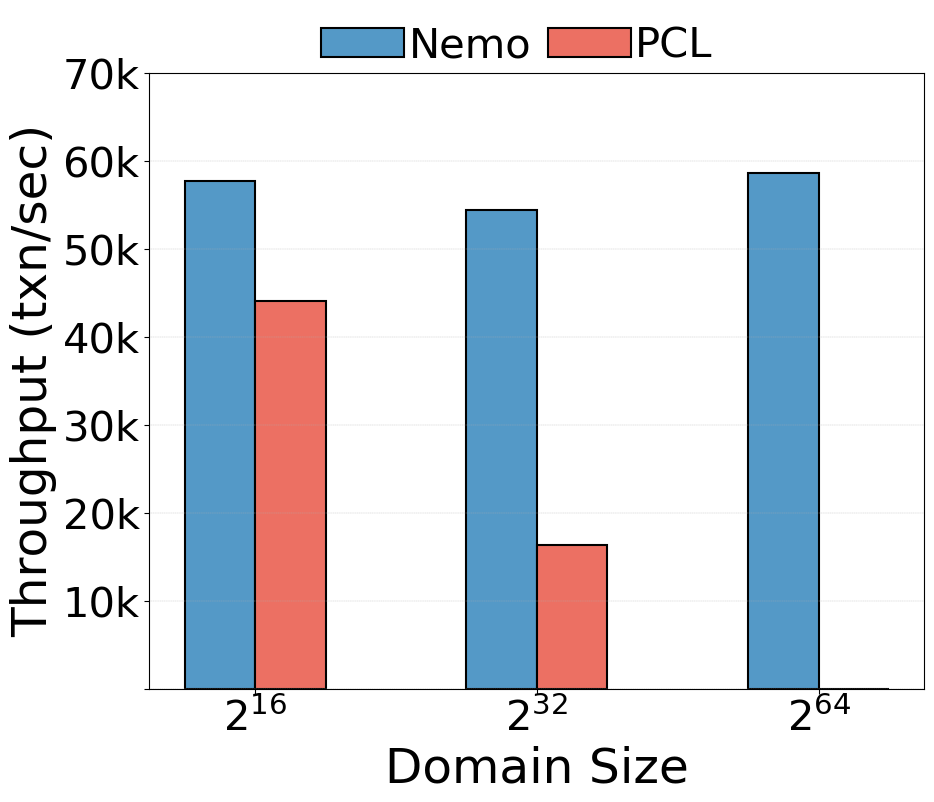

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx
from matplotlib.ticker import FuncFormatter, MultipleLocator


txtsize=35
ticksize=30
lw = 1.5

color_indices, line_colors = select_color_idx(4)
nemo_c = line_colors["BLUE"]
pcl_c = line_colors["RED"]


datadir = "../../output/phantom_protection/"
nemo = "pp_varydomain_fixlocktbl_skew_extralocktbl"
pcl = "pp_varydomain_fixlocktbl_skew_extralocktbl"
x_dimension = "g_partition_covering_lock_unit_sz"



# Load and prepare the data
data_nemo = [json.loads(line) for line in open(datadir + nemo + ".txt")]
data_nemo = [item for item in data_nemo if item["g_phantom_protection_type"] == "PHANTOM_NEXT"]
df_nemo = pd.DataFrame().from_records(data_nemo).sort_values(by=x_dimension)

data_pcl = [json.loads(line) for line in open(datadir + pcl + ".txt")]
data_pcl = [item for item in data_pcl if item["g_phantom_protection_type"] == "PCL"]
df_pcl = pd.DataFrame().from_records(data_pcl).sort_values(by=x_dimension)

dimension = "insert_txn_cnt_"

bar_width = 0.25
indices = np.arange(len(df_nemo))
offset = bar_width

print(df_nemo[dimension])
fig, ax1 = plt.subplots(figsize=(10, 8))

# Bar chart for the primary data
ax1.bar(indices - offset/2, df_nemo[dimension]/5, bar_width,edgecolor='black', linewidth=lw, label="Nemo", color=nemo_c)
ax1.bar(indices + offset/2, df_pcl[dimension]/5, bar_width, edgecolor='black', linewidth=lw,label="PCL", color=pcl_c)

ax1.set_xticks(indices)

exponents = [16, 32, 64]
pretty_labels = [rf"$2^{{{k}}}$" for k in exponents]
ax1.set_xticklabels(pretty_labels)

ax1.yaxis.set_major_locator(MultipleLocator(10_000))
ax1.yaxis.set_major_formatter(
    FuncFormatter(lambda val, _pos: "" if val == 0 else f"{int(val/1000)}k")
)

ax1.set_ylim(0, 70000)
ax1.tick_params(axis='both', labelsize=ticksize)
ax1.set_ylabel("Throughput (txn/sec)", fontsize=txtsize)
ax1.set_xlabel("Domain Size", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)


legend = ax1.legend(fontsize=ticksize, bbox_to_anchor=(0.2, 1.0, 1.1, .102), loc=2,
           ncol=2,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)



plt.savefig("/home/hippo/Nemo/figures/pp_varydomain_throughput.pdf",bbox_inches='tight')

## Latency

0    223.073
1    598.461
2        NaN
Name: insert_txn_latency_avg_us, dtype: float64


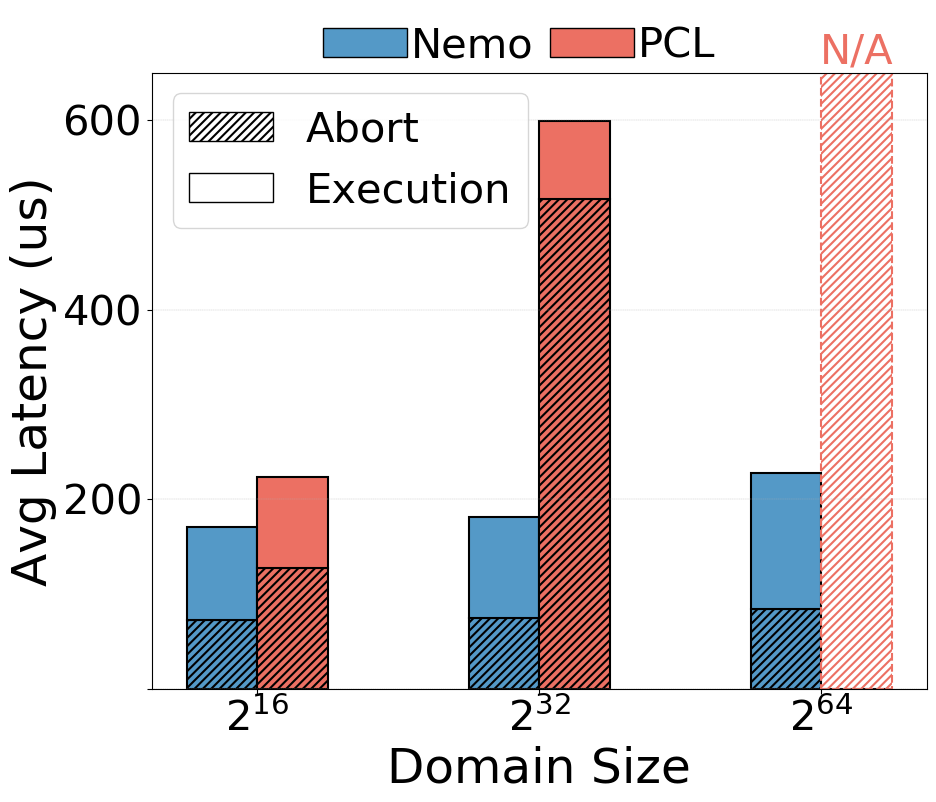

In [ ]:
from matplotlib.patches import Patch
# fig, ax1 = plt.subplots(figsize=(12, 9.6))
fig, ax1 = plt.subplots(figsize=(10, 8))
offset = bar_width
ax1.set_ylim(0, 650)
insert_latency_label = "insert_txn_latency_avg_us"
insert_abort_latency_label = "avg_insert_abort_time_ (us)"

nemo_label = "Nemo"
pcl_label = "PCL"

lw = 1.5

plt.rcParams['hatch.linewidth'] = lw

indices = np.arange(len(df_nemo))
cur_label= nemo_label
cur_color= nemo_c
cur_df = df_nemo
cur_exec_time = cur_df[insert_latency_label] - cur_df[insert_abort_latency_label] 
cur_idx = 2
barloc = indices - offset/2

ax1.bar(barloc, 
        cur_df[insert_abort_latency_label], width=bar_width,edgecolor='black', linewidth=lw, hatch='////',
        color=cur_color,
        label=cur_label+"-Abort-Time")
ax1.bar(barloc, 
        cur_exec_time, bottom=cur_df[insert_abort_latency_label], width=bar_width, linewidth=lw, edgecolor='black',
        color=cur_color,
        label=cur_label+"-Execution-Time")


cur_label=pcl_label
cur_color=pcl_c
cur_df = df_pcl 
cur_exec_time = cur_df[insert_latency_label] - cur_df[insert_abort_latency_label] 
cur_idx = 4
barloc = indices + offset/2
print(cur_df[insert_latency_label])
ax1.bar(barloc, 
        cur_df[insert_abort_latency_label], width=bar_width,edgecolor='black', linewidth=lw,hatch='////',
        color=cur_color,
        label=cur_label+"-Abort-Time")
ax1.bar(barloc, 
        cur_exec_time, bottom=cur_df[insert_abort_latency_label], width=bar_width,linewidth=lw, edgecolor='black',
        color=cur_color,
        label=cur_label+"-Execution-Time")




timeout_x = indices[-1] + offset/2        # where the last PCL bar would be
ylim_top = 650                             # same value you pass to set_ylim
timeout_height = ylim_top            # show most of the bar but not all

ax1.bar(
    timeout_x,
    timeout_height,
    width=bar_width,
    bottom=0,
    edgecolor=pcl_c,
    linewidth=lw,
    facecolor='none',
    hatch='////',
    linestyle='--',
    label=None,
)

ymin, ymax = ax1.get_ylim()

ax1.text(timeout_x, ymax, "N/A", color=pcl_c,
         ha='center', va='bottom', fontsize=ticksize)



location = "best"
# ax1.legend(loc=location, frameon=False)
ax1.set_ylabel("Avg Latency (us)", fontsize=txtsize)
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
ax1.set_xlabel("Domain Size", fontsize=txtsize)


ax1.set_xticks(indices)


exponents = [16, 32, 64]
pretty_labels = [rf"$2^{{{k}}}$" for k in exponents]
ax1.set_xticklabels(pretty_labels)

ax1.yaxis.set_major_locator(MultipleLocator(10_000))
ax1.yaxis.set_major_formatter(
    FuncFormatter(lambda val, _pos: "" if val == 0 else f"{int(val/1000)}k")
)


ax1.tick_params(axis='both', labelsize=ticksize)

subcategories = ['Abort', 'Execution']  # Stacks within each bar
bar_labels = [ nemo_label, pcl_label]  # Bars within each group


# Colors for the bars (categories)
colors = [nemo_c, pcl_c]

# Hatches for the subcategories
hatches = ['////', '']

# Create custom patches for the subcategories
hatch_patches = [Patch(facecolor='white', edgecolor='black', hatch=h, label=sc)
                 for h, sc in zip(hatches, subcategories)]

# Create custom patches for the categories
color_patches = [Patch(facecolor=c, edgecolor='black', label=bl)
                 for c, bl in zip(colors, bar_labels)]


lat_step = 200  # tweak to taste
lat_ticks = np.arange(0, 800, lat_step)

ax1.set_yticks(lat_ticks)
ax1.set_yticklabels([f"{int(t)}" if t != 0 else "" for t in lat_ticks])

# Create legends
subcat_legend = plt.legend(ncol=1, handles=hatch_patches,fontsize=ticksize, loc="upper left",)
ax1.add_artist(subcat_legend)  # Add the first legend manually to keep it when adding the second
legend = plt.legend(handles=color_patches, fontsize=ticksize, bbox_to_anchor=(0.2, 1.0, 1.1, .102), loc=2,
           ncol=2,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)


plt.savefig("/home/hippo/Nemo/figures/pp_varydomain_latency.pdf",bbox_inches='tight')
